In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#Reading excel sheet for the clustering

excel_sheet = pd.read_excel(r'C:\Users\nicol\Downloads\data.xlsx')

In [3]:
#Display of the first 5 values

excel_sheet.head()

,Ticker,Name,Return on Assets,Return on Invested Capital,EBITDA Margin,Net Income Margin,Total Debt,EV/Sales,EV/EBITDA,EV/EBIT,Net Debt/Equity,Net Debt/Capital,sector,sub sector
0,AVGO UW Equity,Broadcom Inc,15.4483,20.1602,58.1484,34.6204,39978.000,6.7835,11.6659,15.8136,121.37,54.8268,Information Technology,Semiconductors
1,HPQ UN Equity,HP Inc,8.2982,46.1281,9.0326,5.0855,12294.000,0.5750,6.3661,7.6363,—,146.8304,Information Technology,"Technology Hardware, Storage &"
2,MPWR UW Equity,Monolithic Power Systems Inc,24.0168,29.4596,31.8245,24.3944,3.797,8.8752,27.8880,30.2218,-43.9935,-78.5506,Information Technology,Semiconductors
3,IBM UN Equity,International Business Machines Corp,1.2644,16.3830,21.9577,2.7077,54013.000,2.8583,13.0172,22.6647,205.599,67.2774,Information Technology,IT Consulting & Other Services
4,ADI UW Equity,Analog Devices Inc,5.3565,6.3202,46.9193,22.8781,6939.532,6.5970,14.0603,24.0833,14.9977,13.0417,Information Technology,Semiconductors


In [4]:
#Dimensions of data table

excel_sheet.shape

(64, 14)

In [2]:
#Display of missing values in NaN

excel_sheet = pd.read_excel(r'C:\Users\nicol\Downloads\data.xlsx',na_values = excel_sheet.loc[1,"Net Debt/Equity"])

In [3]:
excel_sheet.dtypes

Ticker                         object
Name                           object
Return on Assets              float64
Return on Invested Capital    float64
EBITDA Margin                 float64
Net Income Margin             float64
Total Debt                    float64
EV/Sales                      float64
EV/EBITDA                     float64
EV/EBIT                       float64
Net Debt/Equity               float64
Net Debt/Capital              float64
sector                         object
sub sector                     object
dtype: object

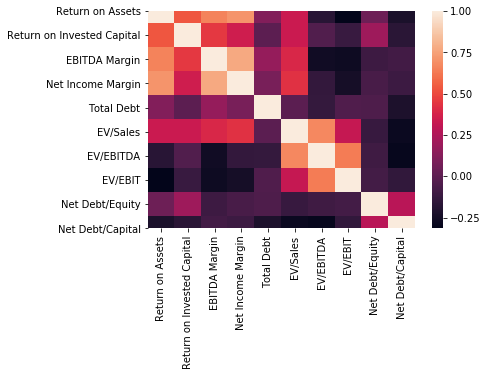

In [7]:
#Display of correlations

sns.heatmap(excel_sheet.corr());

In [8]:
#Decription of the differents columns (ratios)

excel_sheet.describe()

,Return on Assets,Return on Invested Capital,EBITDA Margin,Net Income Margin,Total Debt,EV/Sales,EV/EBITDA,EV/EBIT,Net Debt/Equity,Net Debt/Capital
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,63.000000,58.000000,64.000000
mean,12.774103,25.727208,29.588058,19.084250,10838.366516,5.733438,21.273294,35.853287,193.458274,16.755269
std,8.667228,50.231191,13.190963,13.385115,22164.202952,4.017517,16.862600,52.516248,806.073531,79.685336
min,-0.563900,-7.241000,7.449400,-1.686200,3.797000,0.575000,3.496100,6.085100,-142.482100,-260.834600
25%,6.124150,8.168275,20.532750,10.692675,1704.275000,2.885450,10.675300,14.512400,-14.472525,-10.589225
50%,11.315750,16.782100,27.984950,16.214100,3952.450000,4.554800,15.932250,22.664200,19.976800,20.804200
75%,17.664175,29.513050,39.086450,25.306450,7609.250000,7.966975,23.516100,33.902650,49.664775,44.902725
max,36.253100,405.169000,69.478600,84.602900,132480.000000,20.918200,85.250000,376.373200,4661.467900,335.393300


In [9]:
#Number of missing values per column

excel_sheet.isna().sum()

Ticker                        0
Name                          0
Return on Assets              0
Return on Invested Capital    0
EBITDA Margin                 0
Net Income Margin             0
Total Debt                    0
EV/Sales                      0
EV/EBITDA                     0
EV/EBIT                       1
Net Debt/Equity               6
Net Debt/Capital              0
sector                        0
sub sector                    0
dtype: int64

In [10]:
#First remarks

excel_sheet.sector.unique()

array(['Information Technology'], dtype=object)

In [11]:
excel_sheet['sub sector'].unique()

array(['Semiconductors', 'Technology Hardware, Storage &',
       'IT Consulting & Other Services', 'Communications Equipment',
       'Systems Software', 'Semiconductor Materials & Equi',
       'Electronic Components', 'Technology Distributors',
       'Electronic Equipment & Instrum', 'Application Software',
       'Internet Services & Infrastruc', 'Electronic Manufacturing Servi'],
      dtype=object)

In [12]:
len(excel_sheet['sub sector'].unique())

12

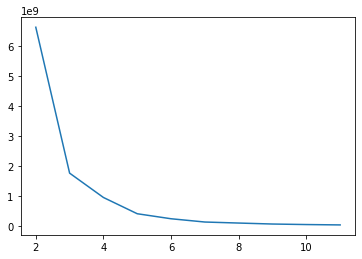

In [13]:
#There are 12 sub-sectors of activity represented 
#The objective is to use an unsupervised learning technique (KMeans) to find the appropriate number of clusters K
#We use the Elbow method to determine K
#The elbow method is used by running several k-means, increment k with each iteration, and record the SSE 
#𝑆𝑆𝐸=𝑆𝑢𝑚 𝑂𝑓 𝐸𝑢𝑐𝑙𝑖𝑑𝑒𝑎𝑛 𝑆𝑞𝑢𝑎𝑟𝑒𝑑 𝐷𝑖𝑠𝑡𝑎𝑛𝑐𝑒𝑠 𝑜𝑓 𝑒𝑎𝑐ℎ 𝑝𝑜𝑖𝑛𝑡 𝑡𝑜 𝑖𝑡𝑠 𝑐𝑙𝑜𝑠𝑒𝑠𝑡 𝑐𝑒𝑛𝑡𝑟𝑜𝑖𝑑 (decreasing function of K)

from sklearn.cluster import KMeans

var = []
for i in range(2,12):
    group = KMeans(n_clusters=i).fit(excel_sheet.select_dtypes("number").dropna())
    var.append(group.inertia_)
    

plt.plot(range(2,12),var)

In [14]:
!pip install kneed

In [15]:
import kneed

In [16]:
# get elbow programmatically
from kneed import KneeLocator 
kl = KneeLocator(
range(2,12), var, curve="convex", direction="decreasing")
elbow=kl.elbow
print('Elbow = {}'.format(elbow))

Elbow = 4


In [17]:
# We apply KMeans for the Elbow's value  ( in this case = 4)
kmeans = KMeans(n_clusters=elbow)
km = kmeans.fit(excel_sheet.select_dtypes("number").dropna())

dropna = excel_sheet.select_dtypes("number").dropna()
dropna["cluster"] = km.labels_

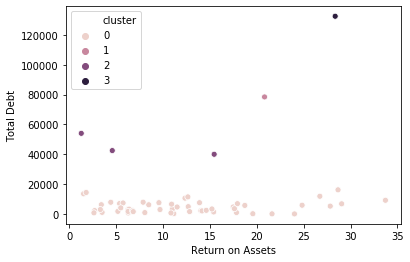

In [18]:
sns.scatterplot(x="Return on Assets", y="Total Debt", hue="cluster", data=dropna);

In [19]:
dropna["cluster"].value_counts()

0    52
2     3
3     1
1     1
Name: cluster, dtype: int64

In [20]:
dropna[dropna["cluster"]==1]

,Return on Assets,Return on Invested Capital,EBITDA Margin,Net Income Margin,Total Debt,EV/Sales,EV/EBITDA,EV/EBIT,Net Debt/Equity,Net Debt/Capital,cluster
7,20.8234,31.7364,50.5896,36.6863,78400.0,9.5356,18.8489,22.6019,-15.826,-18.8016,1


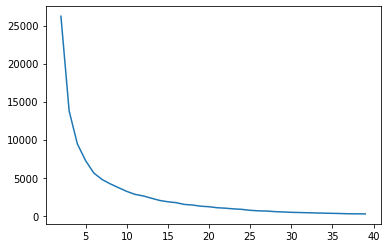

In [21]:
var2 = []
for i in range(2,40):
    group2 = KMeans(n_clusters=i).fit(excel_sheet[['Return on Assets', 'Return on Invested Capital', 'EBITDA Margin']])
    var2.append(group2.inertia_)
    

plt.plot(range(2,40),var2)

In [22]:
# get elbow programmatically
from kneed import KneeLocator 
kl2 = KneeLocator(
range(2,40), var2, curve="convex", direction="decreasing")
elbow2=kl2.elbow
print('Elbow = {}'.format(elbow2))

Elbow = 7


In [23]:
# We apply KMeans for the Elbow's value  ( in this case = 4)
kmeans = KMeans(n_clusters=elbow2)
km2 = kmeans.fit(excel_sheet[['Return on Assets', 'Return on Invested Capital', 'EBITDA Margin']])
excel_sheet["cluster"]=km2.labels_

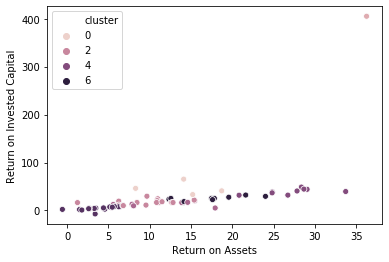

In [24]:
sns.scatterplot(x="Return on Assets", y="Return on Invested Capital", hue="cluster", data=excel_sheet);

In [33]:
excel_sheet2= excel_sheet.drop(41,axis=0)
excel_sheet2.shape
#sns.scatterplot(x="Return on Invested Capital", y="EBITDA Margin", hue="cluster", data=excel_sheet);

(63, 15)

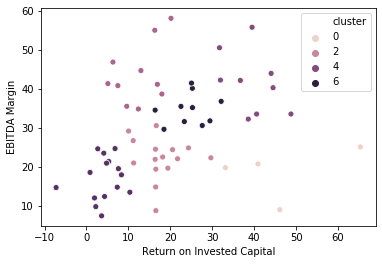

In [34]:
sns.scatterplot(x='Return on Invested Capital', y='EBITDA Margin', hue='cluster', data=excel_sheet2);

In [35]:
excel_sheet2['cluster'].value_counts()

5    15
2    15
6    10
3    10
4     9
0     4
Name: cluster, dtype: int64

In [36]:
km3 = kmeans.fit(excel_sheet[['Return on Assets', 'Return on Invested Capital', 'EBITDA Margin', 'Net Income Margin', 'EV/EBITDA']])
excel_sheet["cluster"]=km3.labels_

In [37]:
excel_sheet2= excel_sheet.drop(41,axis=0)

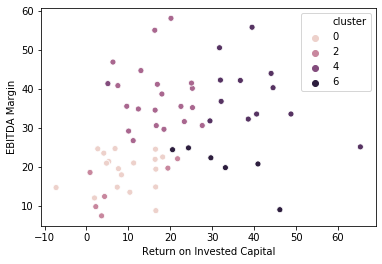

In [38]:
sns.scatterplot(x='Return on Invested Capital', y='EBITDA Margin', hue='cluster', data=excel_sheet2);

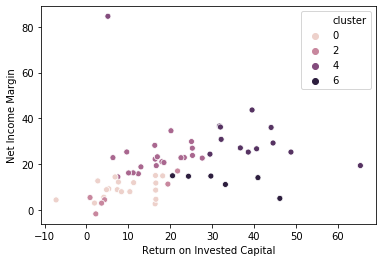

In [39]:
sns.scatterplot(x='Return on Invested Capital', y='Net Income Margin', hue='cluster', data=excel_sheet2);

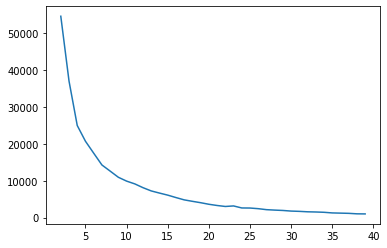

In [41]:
var2 = []
for i in range(2,40):
    group2 = KMeans(n_clusters=i).fit(excel_sheet[['Return on Assets', 'Return on Invested Capital', 'EBITDA Margin', 'Net Income Margin', 'EV/EBITDA']])
    var2.append(group2.inertia_)
    

plt.plot(range(2,40),var2)

In [42]:
# get elbow programmatically
from kneed import KneeLocator 
kl2 = KneeLocator(
range(2,40), var2, curve="convex", direction="decreasing")
elbow2=kl2.elbow
print('Elbow = {}'.format(elbow2))

Elbow = 9


In [43]:
km3 = KMeans(n_clusters=elbow2).fit(excel_sheet[['Return on Assets', 'Return on Invested Capital', 'EBITDA Margin', 'Net Income Margin', 'EV/EBITDA']])
excel_sheet["cluster"]=km3.labels_

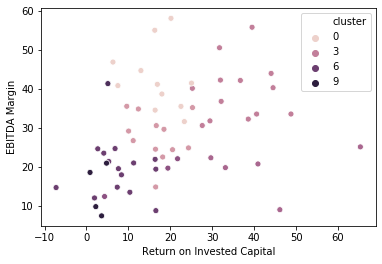

In [45]:
excel_sheet2= excel_sheet.drop(41,axis=0)
sns.scatterplot(x='Return on Invested Capital', y='EBITDA Margin', hue='cluster', data=excel_sheet2);

In [4]:
#For standardizing features, We'll use the StandardScaler module
from sklearn.preprocessing import StandardScaler

In [5]:
scaler=StandardScaler()
excel_sheet_std = scaler.fit_transform(excel_sheet.select_dtypes('number').dropna())

In [6]:
len(excel_sheet_std)

57

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA()
pca.fit(excel_sheet_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.explained_variance_ratio_

array([0.33203952, 0.23355588, 0.12415927, 0.11122357, 0.07219803,
       0.04944071, 0.04043661, 0.02495641, 0.0087328 , 0.0032572 ])

In [10]:
excel_sheet_std[0]

array([ 0.35339628,  0.13231467,  2.41814168,  1.20536476,  1.39011194,
        0.31700687, -0.54512366, -0.39457102, -0.09458647,  0.5960615 ])

In [11]:
excel_sheet.dtypes

Ticker                         object
Name                           object
Return on Assets              float64
Return on Invested Capital    float64
EBITDA Margin                 float64
Net Income Margin             float64
Total Debt                    float64
EV/Sales                      float64
EV/EBITDA                     float64
EV/EBIT                       float64
Net Debt/Equity               float64
Net Debt/Capital              float64
sector                         object
sub sector                     object
dtype: object

In [12]:
excel_sheet = pd.read_excel(r'C:\Users\nicol\Downloads\data.xlsx')
excel_sheet.dtypes

Ticker                         object
Name                           object
Return on Assets              float64
Return on Invested Capital    float64
EBITDA Margin                 float64
Net Income Margin             float64
Total Debt                    float64
EV/Sales                      float64
EV/EBITDA                     float64
EV/EBIT                        object
Net Debt/Equity                object
Net Debt/Capital              float64
sector                         object
sub sector                     object
dtype: object

In [13]:
excel_sheet = pd.read_excel(r'C:\Users\nicol\Downloads\data.xlsx',na_values = excel_sheet.loc[1,"Net Debt/Equity"])

In [14]:
excel_sheet.dtypes

Ticker                         object
Name                           object
Return on Assets              float64
Return on Invested Capital    float64
EBITDA Margin                 float64
Net Income Margin             float64
Total Debt                    float64
EV/Sales                      float64
EV/EBITDA                     float64
EV/EBIT                       float64
Net Debt/Equity               float64
Net Debt/Capital              float64
sector                         object
sub sector                     object
dtype: object

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
excel_sheet_std = scaler.fit_transform(excel_sheet.select_dtypes('number').dropna())

In [17]:
excel_sheet_std[0:3]

array([[ 0.35339628,  0.13231467,  2.41814168,  1.20536476,  1.39011194,
         0.31700687, -0.54512366, -0.39457102, -0.09458647,  0.5960615 ],
       [ 1.40525687,  0.86601313,  0.223024  ,  0.42027733, -0.48880927,
         0.85216863,  0.40909318, -0.13014037, -0.29988787, -1.21265816],
       [-1.38780528, -0.16569658, -0.59975633, -1.24468998,  2.04980387,
        -0.68725615, -0.46563745, -0.26883423,  0.00998466,  0.76490304]])

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA()
pca.fit(excel_sheet_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
pca.explained_variance_ratio_

array([0.33203952, 0.23355588, 0.12415927, 0.11122357, 0.07219803,
       0.04944071, 0.04043661, 0.02495641, 0.0087328 , 0.0032572 ])

Text(0, 0.5, 'Cumulative Explained Variance')

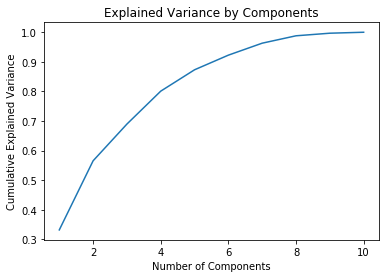

In [21]:
plt.plot(range(1,11),pca.explained_variance_ratio_.cumsum())
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [22]:
pca = PCA(n_components = 4)

In [23]:
pca.fit(excel_sheet_std)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
result_pca = pca.transform(excel_sheet_std)

Text(0.5, 1.0, 'KMeans with PCA Clustering')

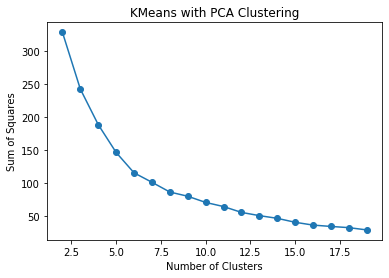

In [25]:
from sklearn.cluster import KMeans

var_pca = []
for i in range(2,20):
    kmeans_pca = KMeans(n_clusters=i)
    kmeans_pca.fit(result_pca)
    var_pca.append(kmeans_pca.inertia_)
    

plt.plot(range(2,20),var_pca,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares')
plt.title('KMeans with PCA Clustering')

In [26]:
# get elbow programmatically
from kneed import KneeLocator 
kl = KneeLocator(
range(2,20), var_pca, curve="convex", direction="decreasing")
elbow=kl.elbow
print('Elbow = {}'.format(elbow))

Elbow = 6


In [27]:
kmeans_pca = KMeans(n_clusters=6)
kmeans_pca.fit(result_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
excel_sheet_pca = pd.concat([excel_sheet.dropna().reset_index(drop=True), pd.DataFrame(result_pca)],axis=1)
excel_sheet_pca.columns.values[-4:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
excel_sheet_pca['PCA cluster'] = kmeans_pca.labels_

In [39]:
excel_sheet_pca.head()

,Ticker,Name,Return on Assets,Return on Invested Capital,EBITDA Margin,Net Income Margin,Total Debt,EV/Sales,EV/EBITDA,EV/EBIT,Net Debt/Equity,Net Debt/Capital,sector,sub sector,Component 1,Component 2,Component 3,Component 4,PCA cluster
0,AVGO UW Equity,Broadcom Inc,15.4483,20.1602,58.1484,34.6204,39978.000,6.7835,11.6659,15.8136,121.3704,54.8268,Information Technology,Semiconductors,2.273440,-0.131342,0.177950,-0.882983,1
1,MPWR UW Equity,Monolithic Power Systems Inc,24.0168,29.4596,31.8245,24.3944,3.797,8.8752,27.8880,30.2218,-43.9935,-78.5506,Information Technology,Semiconductors,1.477106,1.233270,-0.099802,0.188820,1
2,IBM UN Equity,International Business Machines Corp,1.2644,16.3830,21.9577,2.7077,54013.000,2.8583,13.0172,22.6647,205.5992,67.2774,Information Technology,IT Consulting & Other Services,-1.189565,-1.145307,1.410849,0.931534,2
3,ADI UW Equity,Analog Devices Inc,5.3565,6.3202,46.9193,22.8781,6939.532,6.5970,14.0603,24.0833,14.9977,13.0417,Information Technology,Semiconductors,0.051160,-0.087263,0.085489,-1.437887,0
4,CSCO UW Equity,Cisco Systems Inc,12.3364,23.3467,31.6465,22.9106,10561.000,3.4479,10.8951,12.7035,-21.8892,-28.0233,Information Technology,Communications Equipment,0.601105,-0.548328,0.611913,-0.180281,0


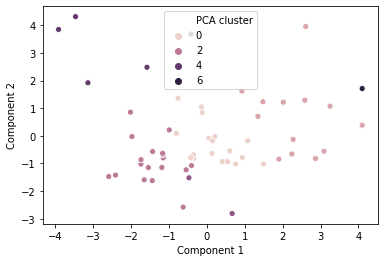

In [41]:
sns.scatterplot('Component 1','Component 2', hue='PCA cluster', data = excel_sheet_pca)